In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#df = pd.read_csv('one_client_1.csv')
#df = pd.read_csv('two_clients_6.csv')
df = pd.read_csv('asio_async_1.csv')
#df = df.loc[df['time'] < 10000]

In [33]:
latency = df['time']
latency.describe()

count    1.000000e+05
mean     3.204073e+07
std      4.994954e+07
min      1.853600e+04
25%      1.875892e+07
50%      3.516616e+07
75%      4.532819e+07
max      3.734100e+09
Name: time, dtype: float64

In [34]:
latency.quantile([0.9, 0.99, 0.999, 0.9999])

0.9000    4.784054e+07
0.9900    4.847292e+07
0.9990    4.910884e+07
0.9999    3.733478e+09
Name: time, dtype: float64

<Axes: >

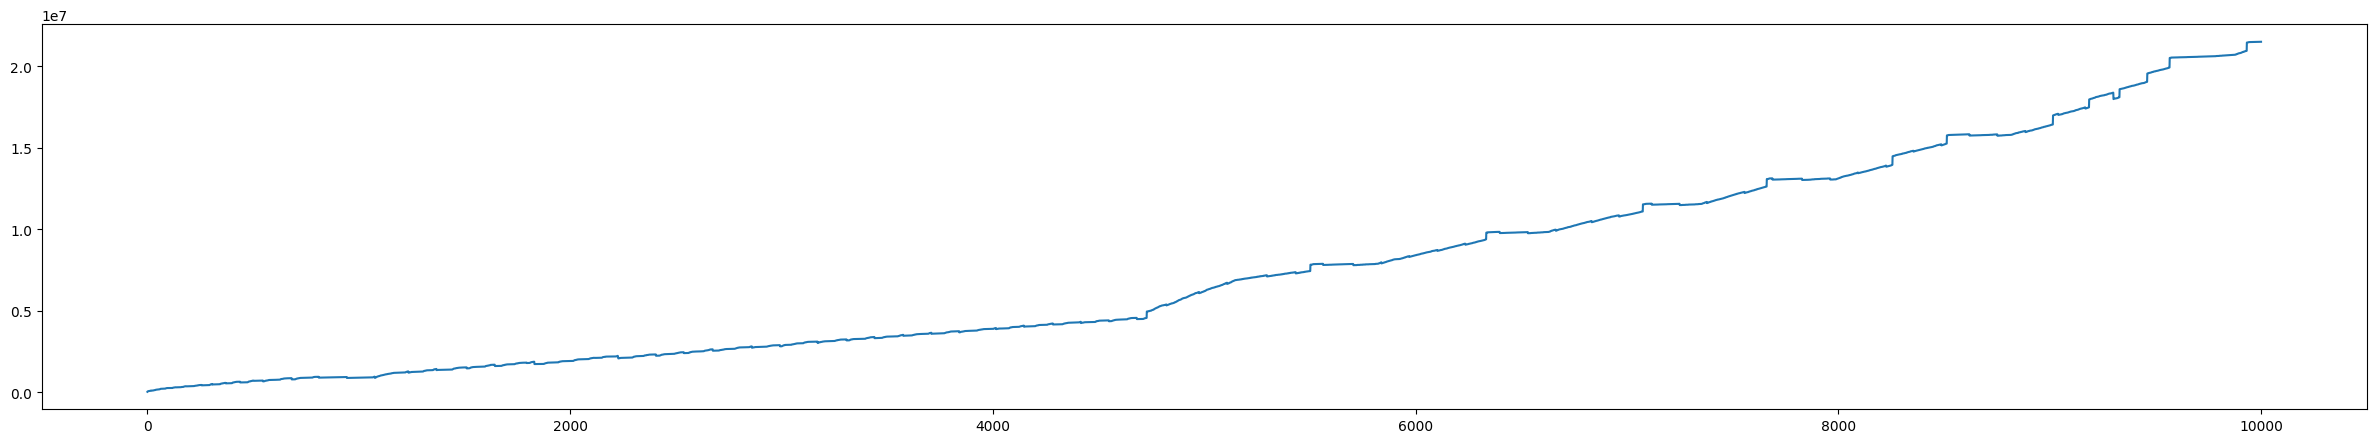

In [35]:
start = 0
end = start + 10000
latency.iloc[start:end].plot(figsize=(30,5))

Text(48472923.15, 78750.0, '99%: 48472918.15')

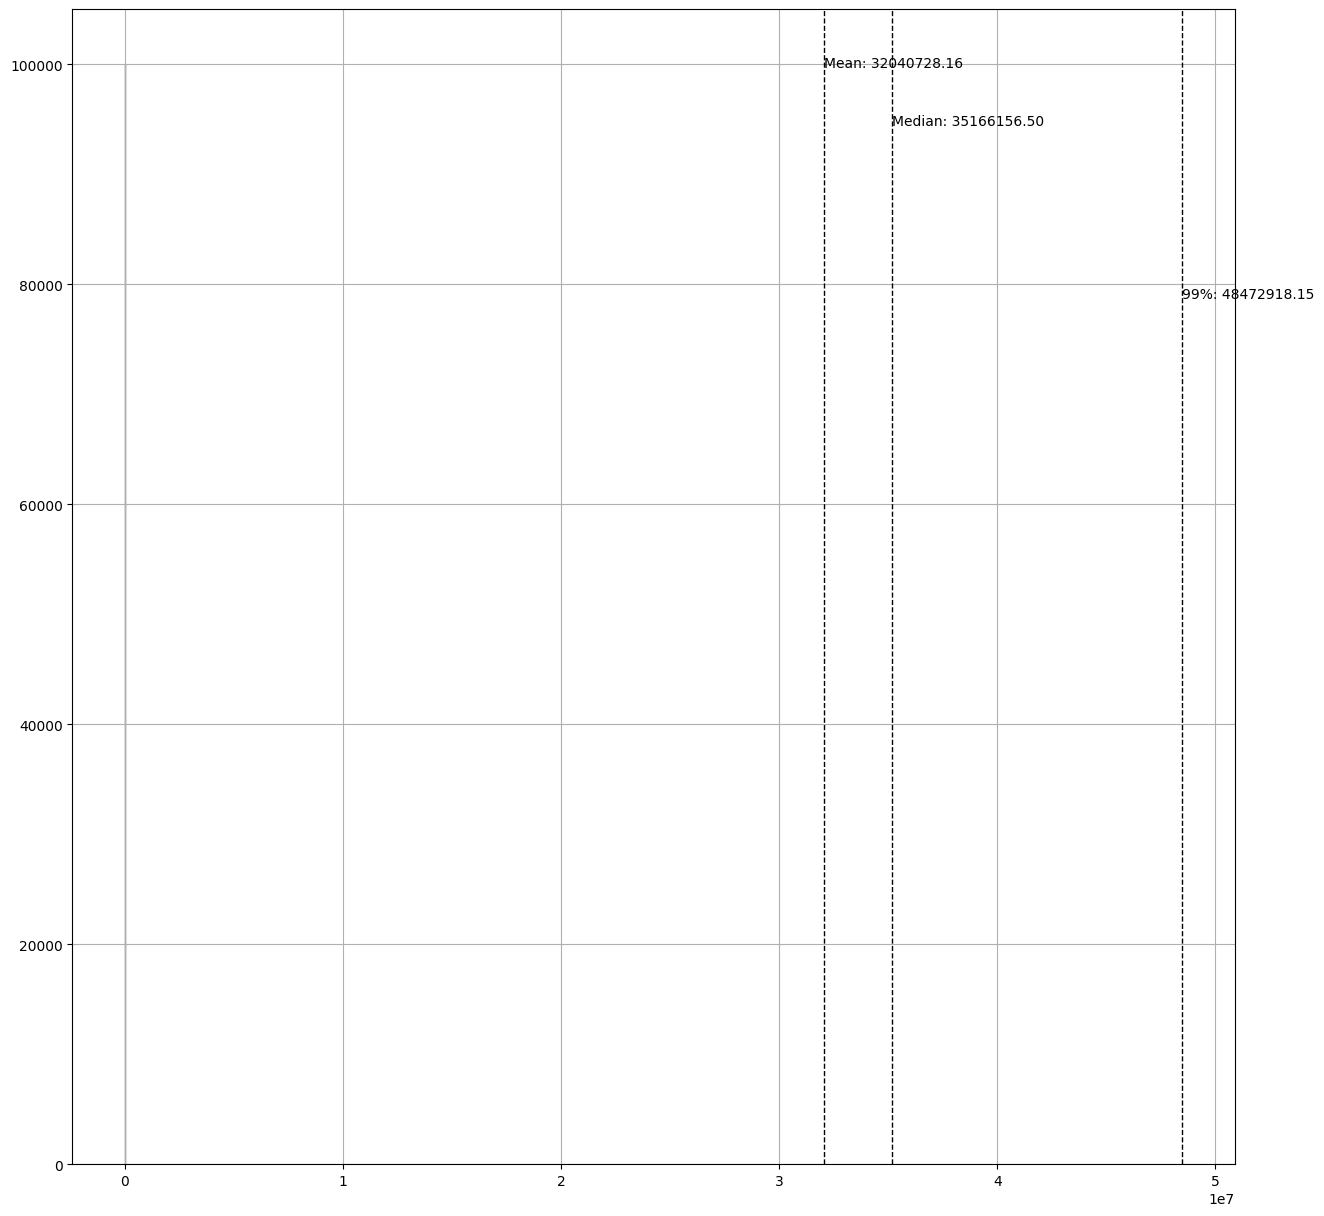

In [36]:
latency.clip(0,15000).hist(bins=75, figsize=(15,15), edgecolor='k', alpha=0.65)
plt.axvline(latency.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(latency.median(), color='k', linestyle='dashed', linewidth=1)
y_min, y_max = plt.ylim()
plt.text(latency.median() + 5, y_max*0.9, 'Median: {:.2f}'.format(latency.median()))
plt.text(latency.mean() + 5, y_max*0.95, 'Mean: {:.2f}'.format(latency.mean()))
percentiles=latency.quantile([0.9, 0.99, 0.999, 0.9999])

plt.axvline(percentiles.iloc[1], color='k', linestyle='dashed', linewidth=1)
plt.text(percentiles.iloc[1] + 5, y_max*0.75, '99%: {:.2f}'.format(percentiles.iloc[1]))